shape: (101766, 50)

columns:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

missing % (top 15):
 weight               96.9
max_glu_serum        94.7
A1Cresult            83.3
medical_specialty    49.1
payer_code           39.6

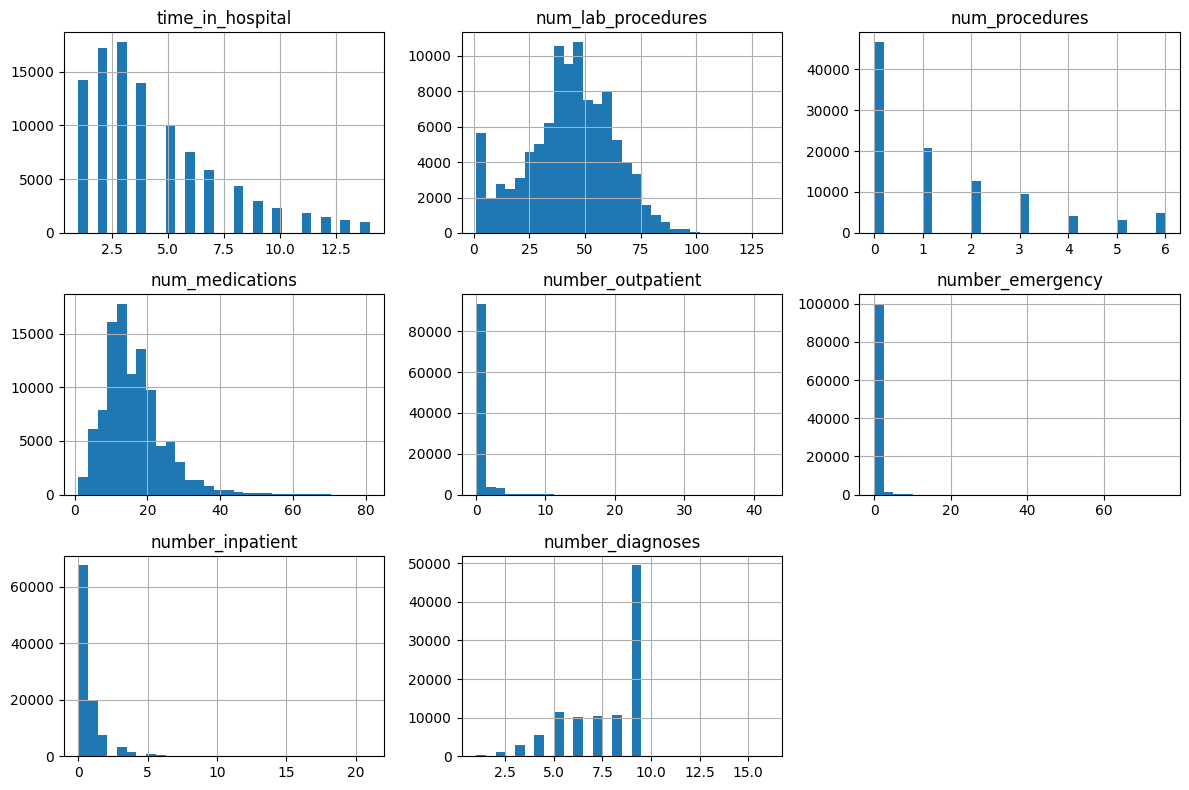

medical_specialty nunique: 72 top: {nan: 49949, 'InternalMedicine': 14635, 'Emergency/Trauma': 7565, 'Family/GeneralPractice': 7440, 'Cardiology': 5352}
diag_1 nunique: 716 top: {'428': 6862, '414': 6581, '786': 4016, '410': 3614, '486': 3508}
diag_2 nunique: 748 top: {'276': 6752, '428': 6662, '250': 6071, '427': 5036, '401': 3736}
diag_3 nunique: 789 top: {'250': 11555, '401': 8289, '276': 5175, '428': 4577, '427': 3955}


In [3]:
# scripts/eda_quicklook.py
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

RAW = Path("/Users/suganthi/mediwatch/data/raw/diabetic_data.csv")
df = pd.read_csv(RAW, low_memory=False)

# replace UCI/Kaggle missing token
df = df.replace("?", np.nan)

print("shape:", df.shape)
print("\ncolumns:\n", df.columns.tolist())
print("\nmissing % (top 15):\n", (df.isna().mean().sort_values(ascending=False)*100).round(1).head(15))

print("\nreadmitted value counts:\n", df["readmitted"].value_counts(dropna=False))
print("\nexample rows:\n", df.sample(3, random_state=42))

# class balance (binary target)
y = (df["readmitted"] == "<30").astype(int)
print("\npositive rate (<30):", y.mean().round(4))

# numeric histograms
num_like = ["time_in_hospital","num_lab_procedures","num_procedures","num_medications",
            "number_outpatient","number_emergency","number_inpatient","number_diagnoses"]
df[num_like].hist(bins=30, figsize=(12,8))
plt.tight_layout(); plt.show()

# high-cardinality peek
for c in ["medical_specialty","diag_1","diag_2","diag_3"]:
    print(c, "nunique:", df[c].nunique(dropna=True), "top:", df[c].value_counts(dropna=False).head(5).to_dict())
